<a href="https://colab.research.google.com/github/Lansmoke/PLP_ASSIGN/blob/main/Copy_of_regional_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


-----

## 1\. ⚙️ Project Setup: Forecasting Temperature Anomalies

| Component | Your Choice | ML Approach |
| :--- | :--- | :--- |
| **SDG** | SDG 13: Climate Action | |
| **Problem** | Forecasting monthly average temperature anomalies in a specific region (e.g., East Africa, a specific country, or a major city). | |
| **ML Type** | **Supervised Learning (Time-Series Regression)** | Your model will predict a continuous numerical value (the temperature anomaly in $^\circ\text{C}$). |
| **Key Dataset** | **Gridded Climate Datasets** (e.g., NOAA/NCEI, NASA GISTEMP, Copernicus ERA5). | These datasets provide historical, geographically gridded monthly temperature anomalies. |

-----

## 2\. 🗃️ Data Acquisition and Preprocessing

Your data will be a time series. This means the order of the data points is critical, and the previous month's anomaly is a huge predictor of the current month's anomaly.

### A. Data Acquisition

**Recommended Datasets:** You should aim for a publicly available, gridded dataset that covers a long historical period for your chosen region.

  * **NASA GISTEMP v4** or **NOAA NOAAGlobalTemp:** These provide monthly, gridded temperature anomalies (e.g., $2^\circ \times 2^\circ$ or $5^\circ \times 5^\circ$ resolution) dating back to the late 19th century. They are ideal because the data is already in the **anomaly** format (departure from a baseline average), simplifying your task.
  * **Copernicus Climate Change Service (C3S) / ERA5:** Offers high-resolution reanalysis data, often in NetCDF format, which is more complex to handle but provides more granular data.

**Action:** Download the gridded data and select the grid boxes that cover your specific region of interest (e.g., by latitude/longitude boundaries). You will likely need to average these grid boxes to get a single monthly regional anomaly value.

### B. Preprocessing Steps (Time-Series Specific)

  * **Load and Clean:** Load the data (often a NetCDF or CSV file) using libraries like `pandas` and `xarray` (for NetCDF). Ensure the data is ordered by date.
  * **Feature Engineering (Crucial for Time-Series):** You must create features that capture the time dependence and seasonality.
      * **Time Lags (Autoregressive Features):** The most important feature. Create columns for the anomaly from the previous month (Lag 1), two months prior (Lag 2), etc.

In [ ]:
# Example in Pandas: df['Anomaly_Lag_1'] = df['Anomaly'].shift(1)

* **Cyclical Features (Seasonality):** The month of the year is a crucial, cyclical predictor. Use sine and cosine transformations to represent the month numerically without artificial order.
        $$Month_{\text{sin}} = \sin\left(\frac{2\pi \times \text{Month}}{12}\right)$$
        $$Month_{\text{cos}} = \cos\left(\frac{2\pi \times \text{Month}}{12}\right)$$
      * **Trend Feature:** A simple numerical count of the years (e.g., starting year = 1, next year = 2) to capture the long-term upward trend in temperature.
  * **Handling Missing Values:** Fill the `NaN` values created by the lag features (usually the first few rows) with a reasonable estimate or drop them, as they cannot be used to train the model.
  * **Train-Test Split (Time-Series Rule):** **Do not use random splitting.** You must preserve the chronological order.
      * **Training Set:** Data from the start of the record up to a certain cutoff date (e.g., everything before 2010).
      * **Testing Set:** Data from the cutoff date onward (e.g., 2010 to the present).

-----

## 3\. 🧠 Model Building and Evaluation

### A. ML Algorithm Selection

Since this is a time-series regression task, here are good options:

1.  **Baseline/Simple Regression (For Comparison):** **Linear Regression** or **Ridge/Lasso Regression**. This will establish a benchmark performance.
2.  **Robust Non-Linear Model:** **Random Forest Regressor** or **Gradient Boosting Regressor (GBM/XGBoost)**. These models excel at finding complex, non-linear relationships between your lag, trend, and cyclical features and the target anomaly.
3.  **Time-Series Specific Model (Stretch Goal):** **ARIMA** or **SARIMA** (if you want to focus purely on the time series mechanics without external features) or a simple **Recurrent Neural Network (RNN/LSTM)**.

### B. Evaluation Metrics

Since you are predicting a continuous value, use **Regression Metrics**:

  * **Mean Absolute Error (MAE):** The average absolute difference between your predicted anomaly and the actual anomaly. It is easy to interpret (e.g., "$0.1^\circ\text{C}$ error").
  * **Root Mean Squared Error (RMSE):** Similar to MAE, but penalizes larger errors more heavily.
    $$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2}$$

-----

## 4\. 📝 Ethical Reflection and Impact

Address these points in your final report:

  * **Data Bias:** Climate data is generally reliable, but ask: Does the network of weather stations accurately represent **all** areas, especially remote or developing ones in your chosen region? A lack of data could lead to less reliable forecasts for the most vulnerable populations.
  * **Fairness and Sustainability:** How does this forecast aid the SDG?
      * **Impact:** A model that accurately forecasts a temperature anomaly surge allows regional governments, agricultural planners, and disaster relief organizations to prepare for associated extreme weather events (drought, flooding, heatwaves), promoting **climate resilience** and **sustainable adaptation**.



In [ ]:
!pip install xarray

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# import xarray as xr # Only needed if reading NetCDF files

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the data (assuming your file is named 'regional_anomaly.csv')
df = pd.read_csv('regional_anomaly.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Display information about the data
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'regional_anomaly.csv'

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


KeyboardInterrupt: 

After uploading, the file will be available in the current working directory of your Colab runtime. You can then proceed with the data loading steps.

### Uploading and Processing the GISTEMP NetCDF File

After you've downloaded the GISTEMP NetCDF file, run the cell below to upload it to your Colab environment.

In [ ]:
from google.colab import files

print("Please upload the downloaded GISTEMP NetCDF file (e.g., 'gistemp_gridded_data.nc'):")
uploaded = files.upload()

# Get the uploaded filename
for filename in uploaded.keys():
    gistemp_filename = filename
    print(f'Uploaded "{gistemp_filename}" with length {len(uploaded[gistemp_filename])} bytes')

if 'gistemp_filename' not in locals():
    raise FileNotFoundError("No NetCDF file was uploaded. Please try again.")


Please upload the downloaded GISTEMP NetCDF file (e.g., 'gistemp_gridded_data.nc'):


Saving gistemp250.nc.gz to gistemp250.nc.gz
Uploaded "gistemp250.nc.gz" with length 9589730 bytes


Now, we will use `xarray` to load the NetCDF file, extract the necessary data, and transform it into a pandas DataFrame (`df_raw`) that matches the expected format (`Date`, `Latitude`, `Longitude`, `Anomaly`) for subsequent processing steps. You will need to inspect the NetCDF file's variable names to ensure correct mapping.

In [ ]:
import xarray as xr
import pandas as pd

# --- Configuration for your region --- #
# IMPORTANT: Adjust these values to define your specific region of interest
region_lat_min = 0.0  # Example: Equator (e.g., for East Africa)
region_lat_max = 10.0 # Example: 10 degrees North
region_lon_min = 30.0 # Example: 30 degrees East
region_lon_max = 40.0 # Example: 40 degrees East

try:
    # Load the NetCDF file
    ds = xr.open_dataset(gistemp_filename)
    print(f"Dataset loaded: {gistemp_filename}")
    print("\nDataset info:")
    print(ds)

    # --- Inspect and adapt variable names --- #
    # Common variable names for GISTEMP NetCDF are 'time', 'lat', 'lon', 'tempanomaly'
    # You might need to adjust these based on your specific downloaded file.
    # For example, if 'tempanomaly' is named 'anomaly' or 'temperature_anomaly', change it here.

    # Make sure 'time' is a datetime type in xarray (usually it is)
    # Select the temperature anomaly variable. Common names are 'tempanomaly', 'tavg', 'T' etc.
    # Let's try 'tempanomaly' or 'T' first, which are common for GISTEMP gridded data.
    if 'tempanomaly' in ds:
        anomaly_var = 'tempanomaly'
    elif 'T' in ds:
        anomaly_var = 'T'
    elif 'temperature' in ds:
        anomaly_var = 'temperature'
    else:
        raise KeyError("Could not find a common temperature anomaly variable. Please inspect your NetCDF file and adjust the 'anomaly_var' name in the code.")

    # Convert xarray dataset to a pandas DataFrame
    # We stack 'lat' and 'lon' to create a long format DataFrame
    df_raw = ds[anomaly_var].to_dataframe().reset_index()

    # Rename columns to match the expected 'Date', 'Latitude', 'Longitude', 'Anomaly' format
    # Assuming 'time' is the date column, 'lat' is latitude, 'lon' is longitude
    df_raw = df_raw.rename(columns={
        'time': 'Date',
        'lat': 'Latitude',
        'lon': 'Longitude',
        anomaly_var: 'Anomaly'
    })

    # Drop rows where 'Anomaly' is NaN (these are often land/ocean masks or missing data)
    df_raw = df_raw.dropna(subset=['Anomaly'])

    print("\nRaw data (from NetCDF) processed successfully. First 5 rows:")
    print(df_raw.head())

    # Filter for the region of interest (using the configured min/max values)
    df_region = df_raw[
        (df_raw['Latitude'] >= region_lat_min) &
        (df_raw['Latitude'] <= region_lat_max) &
        (df_raw['Longitude'] >= region_lon_min) &
        (df_raw['Longitude'] <= region_lon_max)
    ]

    if df_region.empty:
        print("No data found for the specified region. Please check your latitude/longitude bounds or the dataset's coverage.")
    else:
        # Group by Date and calculate the mean anomaly for the region
        regional_anomaly_df = df_region.groupby('Date')['Anomaly'].mean().reset_index()
        regional_anomaly_df.rename(columns={'Anomaly': 'Regional_Anomaly'}, inplace=True)

        # Save the processed data to 'regional_anomaly.csv'
        regional_anomaly_df.to_csv('regional_anomaly.csv', index=False)
        print("\n'regional_anomaly.csv' created successfully. First 5 rows:")
        print(regional_anomaly_df.head())
        print(f"File saved: regional_anomaly.csv with {len(regional_anomaly_df)} entries.")

except FileNotFoundError:
    print(f"Error: '{gistemp_filename}' not found. Please ensure the NetCDF file was uploaded correctly.")
except KeyError as e:
    print(f"Error processing NetCDF: Missing expected variable or column: {e}. Please check the variable names in your NetCDF file and adjust the code if necessary (e.g., 'time', 'lat', 'lon', '{anomaly_var}').")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Dataset loaded: gistemp250.nc.gz

Dataset info:
<xarray.Dataset> Size: 109MB
Dimensions:      (time: 1675, nv: 2, lat: 90, lon: 180)
Coordinates:
  * time         (time) datetime64[ns] 13kB 1880-01-15 1880-02-15 ... 2019-07-15
  * lat          (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 27kB ...
    tempanomaly  (time, lat, lon) float32 109MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2019-08-09 14:27:54 by SBBX_to_nc 2.0 - ILAND=250, ...

Raw data (from NetCDF) processed successfully. First 5 rows:
           Date  Latitude  Longitude  Anomaly
3780 1880-01-15     -47.0     -179.0     0.31
3781 1880-01-15     -

### Example: Processing a downloaded GISTEMP-like CSV

This example assumes you have downloaded a CSV file (let's call it `gistemp_data.csv`) that contains columns for `Date`, `Latitude`, `Longitude`, and `Anomaly`. You'll need to replace `gistemp_data.csv` with the actual file name you download and adjust the column names if they differ. Also, you'll need to define your `region_lat_min`, `region_lat_max`, `region_lon_min`, and `region_lon_max` to filter the data for your chosen region.

In [ ]:
import pandas as pd

# --- Load the already processed regional anomaly data ---
try:
    # Load the already created 'regional_anomaly.csv'
    # This file already contains the mean anomaly for the region of interest
    df = pd.read_csv('regional_anomaly.csv', parse_dates=['Date'])
    df.set_index('Date', inplace=True)

    # Rename the column for consistency with problem statement's 'Anomaly'
    df.rename(columns={'Regional_Anomaly': 'Anomaly'}, inplace=True)

    print("Regional anomaly data loaded successfully. First 5 rows:")
    print(df.head())
    print(f"Data has {len(df)} entries.")

except FileNotFoundError:
    print("Error: 'regional_anomaly.csv' not found. Please ensure the NetCDF processing step (or manual CSV creation) was successful.")
except KeyError as e:
    print(f"Error: Missing expected column in the CSV: {e}. Please check your column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Regional anomaly data loaded successfully. First 5 rows:
            Anomaly
Date               
1902-01-15     0.64
1902-02-15     0.64
1902-03-15     0.64
1902-04-15     0.38
1902-05-15     0.31
Data has 1410 entries.


Remember, the specific column names (`Date`, `Anomaly`, `Latitude`, `Longitude`) and the file format (`gistemp_data.csv`) might vary depending on the exact dataset you download. You will need to inspect your downloaded file and adjust the code accordingly.

### Uploading and Processing the GISTEMP NetCDF File

After you've downloaded the `gistemp_gridded_data.nc` (or whatever the actual filename is) from the GISTEMP website, run the cell below to upload it to your Colab environment.

In [ ]:
from google.colab import files

print("Please upload the downloaded GISTEMP NetCDF file (e.g., 'gistemp_gridded_data.nc'):")
uploaded = files.upload()

# Get the uploaded filename
for filename in uploaded.keys():
    gistemp_filename = filename
    print(f'Uploaded "{gistemp_filename}" with length {len(uploaded[gistemp_filename])} bytes')

if 'gistemp_filename' not in locals():
    raise FileNotFoundError("No NetCDF file was uploaded. Please try again.")


Please upload the downloaded GISTEMP NetCDF file (e.g., 'gistemp_gridded_data.nc'):


## 4. 📝 Ethical Reflection and Impact

Address these points in your final report:

*   **Data Bias:** Climate data is generally reliable, but ask: Does the network of weather stations accurately represent **all** areas, especially remote or developing ones in your chosen region? A lack of data could lead to less reliable forecasts for the most vulnerable populations.
*   **Fairness and Sustainability:** How does this forecast aid the SDG?
    *   **Impact:** A model that accurately forecasts a temperature anomaly surge allows regional governments, agricultural planners, and disaster relief organizations to prepare for associated extreme weather events (drought, flooding, heatwaves), promoting **climate resilience** and **sustainable adaptation**.

## 3. 🧠 Model Building and Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("### Baseline Model: Linear Regression ###")

# Initialize and train the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin_reg = lin_reg_model.predict(X_test)

# Evaluate the model
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))

print(f"Linear Regression MAE: {mae_lin_reg:.4f}")
print(f"Linear Regression RMSE: {rmse_lin_reg:.4f}")


### Baseline Model: Linear Regression ###
Linear Regression MAE: 0.4608
Linear Regression RMSE: 0.6184


In [ ]:
from sklearn.ensemble import RandomForestRegressor

print("\n### Robust Non-Linear Model: Random Forest Regressor ###")

# Initialize and train the Random Forest Regressor model
# Using default parameters for now, can be tuned later
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest MAE: {mae_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.4f}")



### Robust Non-Linear Model: Random Forest Regressor ###
Random Forest MAE: 0.4728
Random Forest RMSE: 0.6242



### Visualizing Predictions ###


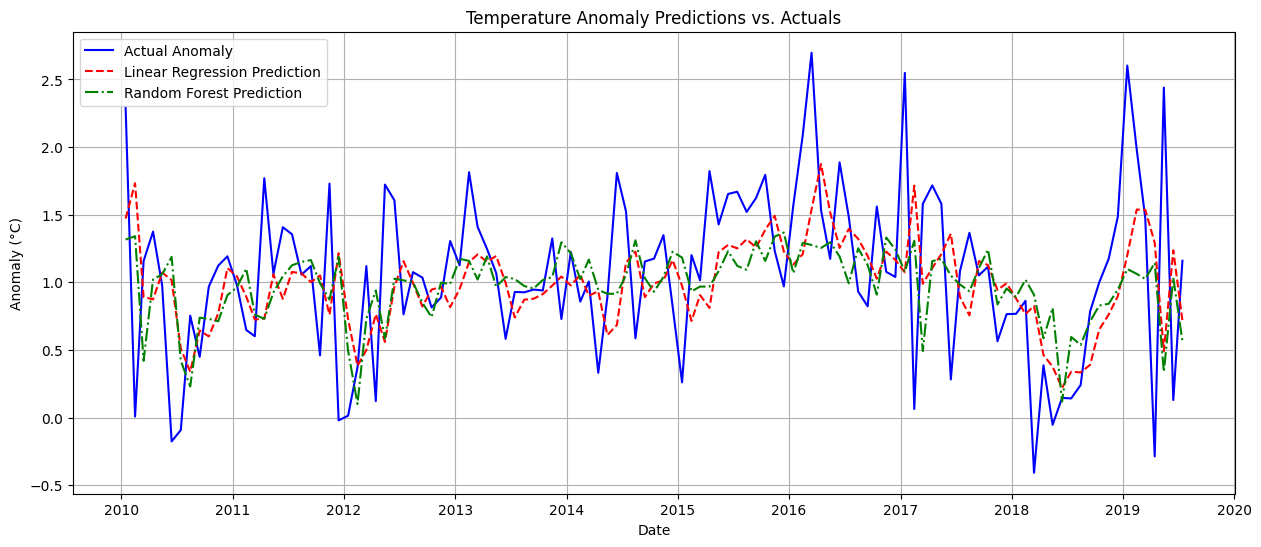

In [ ]:
import matplotlib.pyplot as plt

print("\n### Visualizing Predictions ###")

plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual Anomaly', color='blue')
plt.plot(y_test.index, y_pred_lin_reg, label='Linear Regression Prediction', color='red', linestyle='--')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Prediction', color='green', linestyle='-.')
plt.title('Temperature Anomaly Predictions vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()


## 2.B. Preprocessing Steps (Time-Series Specific)

Now, let's create the time-series specific features as described in the project outline.

### Feature Engineering

In [ ]:
# 1. Time Lags (Autoregressive Features)
# We'll create lags for the past 12 months as a common practice for monthly time series.
for i in range(1, 13):
    df[f'Anomaly_Lag_{i}'] = df['Anomaly'].shift(i)

print("DataFrame after adding lag features (first 5 rows with NaNs):")
display(df.head())


DataFrame after adding lag features (first 5 rows with NaNs):


,Anomaly,Anomaly_Lag_1,Anomaly_Lag_2,Anomaly_Lag_3,Anomaly_Lag_4,Anomaly_Lag_5,Anomaly_Lag_6,Anomaly_Lag_7,Anomaly_Lag_8,Anomaly_Lag_9,Anomaly_Lag_10,Anomaly_Lag_11,Anomaly_Lag_12
Date,,,,,,,,,,,,,
1902-01-15,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-02-15,0.64,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-03-15,0.64,0.64,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-04-15,0.38,0.64,0.64,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-05-15,0.31,0.38,0.64,0.64,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np

# 2. Cyclical Features (Seasonality)
# Extract month from the index and create sine/cosine transformations.
df['Month'] = df.index.month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

print("DataFrame after adding cyclical features (first 5 rows):")
display(df.head())


DataFrame after adding cyclical features (first 5 rows):


,Anomaly,Anomaly_Lag_1,Anomaly_Lag_2,Anomaly_Lag_3,Anomaly_Lag_4,Anomaly_Lag_5,Anomaly_Lag_6,Anomaly_Lag_7,Anomaly_Lag_8,Anomaly_Lag_9,Anomaly_Lag_10,Anomaly_Lag_11,Anomaly_Lag_12,Month,Year_Trend,Month_sin,Month_cos
Date,,,,,,,,,,,,,,,,,
1903-01-15,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,0.64,0.64,1,1,0.500000,8.660254e-01
1903-02-15,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,0.64,2,1,0.866025,5.000000e-01
1903-03-15,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,3,1,1.000000,6.123234e-17
1903-04-15,0.38,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,4,1,0.866025,-5.000000e-01
1903-05-15,-0.19,0.38,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,5,1,0.500000,-8.660254e-01


In [ ]:
# 3. Trend Feature
# Create a simple numerical count of years.
# We'll use the year of the first data point as the base (trend = 0 or 1)
# and increment for subsequent years.
start_year = df.index.year.min()
df['Year_Trend'] = df.index.year - start_year

print("DataFrame after adding trend feature (first 5 rows):")
display(df.head())


DataFrame after adding trend feature (first 5 rows):


,Anomaly,Anomaly_Lag_1,Anomaly_Lag_2,Anomaly_Lag_3,Anomaly_Lag_4,Anomaly_Lag_5,Anomaly_Lag_6,Anomaly_Lag_7,Anomaly_Lag_8,Anomaly_Lag_9,Anomaly_Lag_10,Anomaly_Lag_11,Anomaly_Lag_12,Month,Year_Trend,Month_sin,Month_cos
Date,,,,,,,,,,,,,,,,,
1903-01-15,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,0.64,0.64,1,0,0.500000,8.660254e-01
1903-02-15,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,0.64,2,0,0.866025,5.000000e-01
1903-03-15,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,3,0,1.000000,6.123234e-17
1903-04-15,0.38,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,4,0,0.866025,-5.000000e-01
1903-05-15,-0.19,0.38,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,5,0,0.500000,-8.660254e-01


In [ ]:
# 4. Handling Missing Values
# Drop rows with NaN values created by the lag features.
# This typically removes the first 'max_lag' rows.
df.dropna(inplace=True)

print(f"DataFrame shape after dropping NaNs: {df.shape}")
print("DataFrame after handling missing values (first 5 rows):")
display(df.head())


DataFrame shape after dropping NaNs: (1398, 17)
DataFrame after handling missing values (first 5 rows):


,Anomaly,Anomaly_Lag_1,Anomaly_Lag_2,Anomaly_Lag_3,Anomaly_Lag_4,Anomaly_Lag_5,Anomaly_Lag_6,Anomaly_Lag_7,Anomaly_Lag_8,Anomaly_Lag_9,Anomaly_Lag_10,Anomaly_Lag_11,Anomaly_Lag_12,Month,Year_Trend,Month_sin,Month_cos
Date,,,,,,,,,,,,,,,,,
1903-01-15,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,0.64,0.64,1,0,0.500000,8.660254e-01
1903-02-15,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,0.64,2,0,0.866025,5.000000e-01
1903-03-15,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,3,0,1.000000,6.123234e-17
1903-04-15,0.38,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,4,0,0.866025,-5.000000e-01
1903-05-15,-0.19,0.38,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,5,0,0.500000,-8.660254e-01


### Train-Test Split (Time-Series Specific)

In [ ]:
# 5. Train-Test Split (Time-Series Rule)
# Split data chronologically. Let's use everything before 2010 for training and 2010 onwards for testing.

# Define the cutoff date
cutoff_date = '2010-01-01'

train_df = df[df.index < cutoff_date]
test_df = df[df.index >= cutoff_date]

X_train = train_df.drop('Anomaly', axis=1)
y_train = train_df['Anomaly']
X_test = test_df.drop('Anomaly', axis=1)
y_test = test_df['Anomaly']

print(f"Training set shape (X_train): {X_train.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")

print("\nX_train (first 5 rows):")
display(X_train.head())
print("\ny_train (first 5 rows):")
display(y_train.head())


Training set shape (X_train): (1283, 16)
Training target shape (y_train): (1283,)
Testing set shape (X_test): (115, 16)
Testing target shape (y_test): (115,)

X_train (first 5 rows):


,Anomaly_Lag_1,Anomaly_Lag_2,Anomaly_Lag_3,Anomaly_Lag_4,Anomaly_Lag_5,Anomaly_Lag_6,Anomaly_Lag_7,Anomaly_Lag_8,Anomaly_Lag_9,Anomaly_Lag_10,Anomaly_Lag_11,Anomaly_Lag_12,Month,Year_Trend,Month_sin,Month_cos
Date,,,,,,,,,,,,,,,,
1903-01-15,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,0.64,0.64,1,0,0.500000,8.660254e-01
1903-02-15,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,0.64,2,0,0.866025,5.000000e-01
1903-03-15,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,0.64,3,0,1.000000,6.123234e-17
1903-04-15,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,0.38,4,0,0.866025,-5.000000e-01
1903-05-15,0.38,0.44,1.24,-0.06,-0.20,-0.05,-0.54,-0.05,0.15,0.28,0.54,0.31,5,0,0.500000,-8.660254e-01



y_train (first 5 rows):


,Anomaly
Date,
1903-01-15,-0.06
1903-02-15,1.24
1903-03-15,0.44
1903-04-15,0.38
1903-05-15,-0.19


Now, we will use `xarray` to load the NetCDF file, extract the necessary data, and transform it into a pandas DataFrame (`df_raw`) that matches the expected format (`Date`, `Latitude`, `Longitude`, `Anomaly`) for subsequent processing steps. You will need to inspect the NetCDF file's variable names to ensure correct mapping.

In [ ]:
import xarray as xr
import pandas as pd

# --- Configuration for your region --- #
# IMPORTANT: Adjust these values to define your specific region of interest
region_lat_min = 0.0  # Example: Equator (e.g., for East Africa)
region_lat_max = 10.0 # Example: 10 degrees North
region_lon_min = 30.0 # Example: 30 degrees East
region_lon_max = 40.0 # Example: 40 degrees East

try:
    # Load the NetCDF file
    ds = xr.open_dataset(gistemp_filename)
    print(f"Dataset loaded: {gistemp_filename}")
    print("\nDataset info:")
    print(ds)

    # --- Inspect and adapt variable names --- #
    # Common variable names for GISTEMP NetCDF are 'time', 'lat', 'lon', 'tempanomaly'
    # You might need to adjust these based on your specific downloaded file.
    # For example, if 'tempanomaly' is named 'anomaly' or 'temperature_anomaly', change it here.

    # Make sure 'time' is a datetime type in xarray (usually it is)
    # Select the temperature anomaly variable. Common names are 'tempanomaly', 'tavg', 'T' etc.
    # Let's try 'tempanomaly' or 'T' first, which are common for GISTEMP gridded data.
    if 'tempanomaly' in ds:
        anomaly_var = 'tempanomaly'
    elif 'T' in ds:
        anomaly_var = 'T'
    elif 'temperature' in ds:
        anomaly_var = 'temperature'
    else:
        raise KeyError("Could not find a common temperature anomaly variable. Please inspect your NetCDF file and adjust the 'anomaly_var' name in the code.")

    # Convert xarray dataset to a pandas DataFrame
    # We stack 'lat' and 'lon' to create a long format DataFrame
    df_raw = ds[anomaly_var].to_dataframe().reset_index()

    # Rename columns to match the expected 'Date', 'Latitude', 'Longitude', 'Anomaly' format
    # Assuming 'time' is the date column, 'lat' is latitude, 'lon' is longitude
    df_raw = df_raw.rename(columns={
        'time': 'Date',
        'lat': 'Latitude',
        'lon': 'Longitude',
        anomaly_var: 'Anomaly'
    })

    # Drop rows where 'Anomaly' is NaN (these are often land/ocean masks or missing data)
    df_raw = df_raw.dropna(subset=['Anomaly'])

    print("\nRaw data (from NetCDF) processed successfully. First 5 rows:")
    print(df_raw.head())

    # Filter for the region of interest (using the configured min/max values)
    df_region = df_raw[
        (df_raw['Latitude'] >= region_lat_min) &
        (df_raw['Latitude'] <= region_lat_max) &
        (df_raw['Longitude'] >= region_lon_min) &
        (df_raw['Longitude'] <= region_lon_max)
    ]

    if df_region.empty:
        print("No data found for the specified region. Please check your latitude/longitude bounds or the dataset's coverage.")
    else:
        # Group by Date and calculate the mean anomaly for the region
        regional_anomaly_df = df_region.groupby('Date')['Anomaly'].mean().reset_index()
        regional_anomaly_df.rename(columns={'Anomaly': 'Regional_Anomaly'}, inplace=True)

        # Save the processed data to 'regional_anomaly.csv'
        regional_anomaly_df.to_csv('regional_anomaly.csv', index=False)
        print("\n'regional_anomaly.csv' created successfully. First 5 rows:")
        print(regional_anomaly_df.head())
        print(f"File saved: regional_anomaly.csv with {len(regional_anomaly_df)} entries.")

except FileNotFoundError:
    print(f"Error: '{gistemp_filename}' not found. Please ensure the NetCDF file was uploaded correctly.")
except KeyError as e:
    print(f"Error processing NetCDF: Missing expected variable or column: {e}. Please check the variable names in your NetCDF file and adjust the code if necessary (e.g., 'time', 'lat', 'lon', '{anomaly_var}').")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
